In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv(r"C:\Users\Honey\Desktop\Machine_Learning_Algorithms\Datasets\winequality_red.csv")
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [3]:
# ProfileReport(df)

[Text(0.4444444444444444, 0.875, 'volatile acidity <= 0.44\ngini = 0.578\nsamples = 15\nvalue = [1, 9, 2, 3]\nclass = 5'),
 Text(0.2222222222222222, 0.625, 'pH <= 3.23\ngini = 0.444\nsamples = 3\nvalue = [0, 0, 2, 1]\nclass = 6'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0]\nclass = 6'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1]\nclass = 7'),
 Text(0.6666666666666666, 0.625, 'total sulfur dioxide <= 25.0\ngini = 0.403\nsamples = 12\nvalue = [1, 9, 0, 2]\nclass = 5'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2]\nclass = 7'),
 Text(0.7777777777777778, 0.375, 'residual sugar <= 3.5\ngini = 0.18\nsamples = 10\nvalue = [1, 9, 0, 0]\nclass = 5'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 9\nvalue = [0, 9, 0, 0]\nclass = 5'),
 Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]\nclass = 4')]

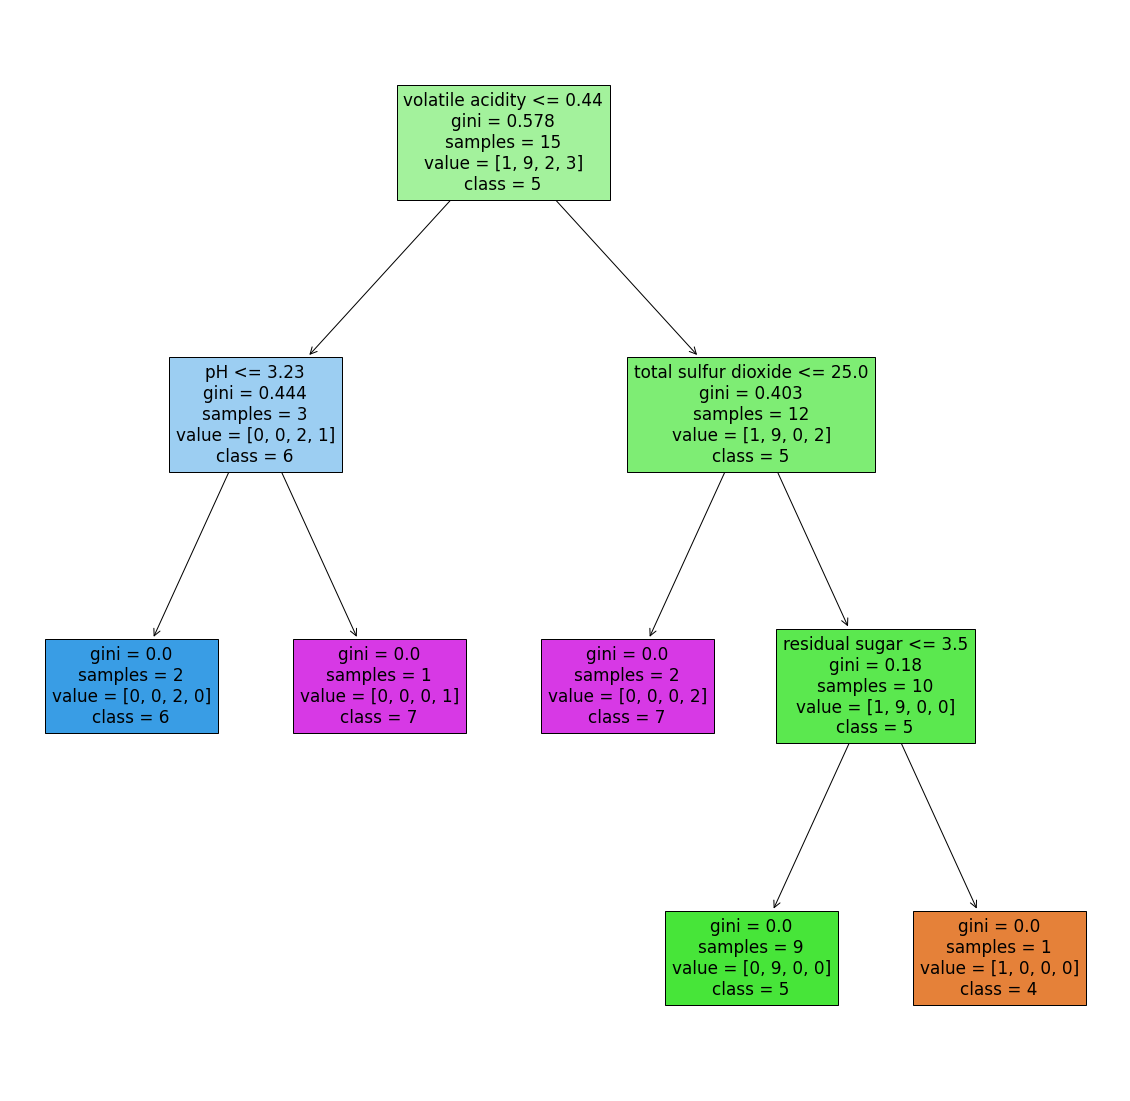

In [4]:
df_new = df.head(20)
X_train,X_test,y_train,y_test = train_test_split(df_new.drop("quality",axis=1),df_new["quality"],test_size=0.25,random_state=30)
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
plt.figure(figsize=(20,20))
tree.plot_tree(model,filled=True, class_names=[str(i) for i in set(y_train)], feature_names=X_train.columns) 
# decision tree will be plotted for 20 samples


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("quality",axis=1),df["quality"],test_size=0.25,random_state=30)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Training data accuracy: ",model.score(X_train,y_train))
print("Test data accuracy: ",model.score(X_test,y_test))

Training data accuracy:  1.0
Test data accuracy:  0.625


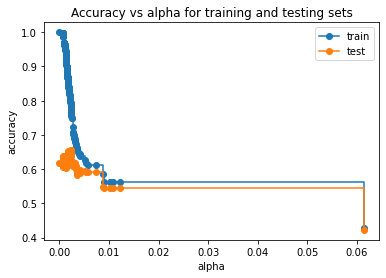

In [6]:
path = model.cost_complexity_pruning_path(X_train,y_train)
ccp_alpha = path.ccp_alphas
model_list = []
train_score = []
test_score = []
for ccp in ccp_alpha:
    model = DecisionTreeClassifier(ccp_alpha=ccp)
    model.fit(X_train,y_train)
    model_list.append(model)
    train_score.append(model.score(X_train,y_train))
    test_score.append(model.score(X_test,y_test))

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alpha,train_score, label='train', marker='o', drawstyle="steps-post")
ax.plot(ccp_alpha,test_score, label='test', marker='o', drawstyle="steps-post")
ax.legend()
plt.show()

In [7]:
model_cpp = DecisionTreeClassifier(ccp_alpha=0.014, random_state=0)
model_cpp.fit(X_train,y_train)
plt.figure(figsize=(20,20))
# tree.plot_tree(model_cpp,filled=True)
print(model_cpp.score(X_train,y_train))
print(model_cpp.score(X_test,y_test))

0.5621351125938282
0.545


<Figure size 1440x1440 with 0 Axes>

In [8]:
grid_param = {"criterion":['gini','entropy'],
                "splitter":['best','random'],
                "max_depth": range(10,20,1),
                "min_samples_split":range(2,4,1),
                "min_samples_leaf":range(1,3,1),
                "ccp_alpha":np.random.rand(20)}
grid_ccp = GridSearchCV(estimator= model_cpp, param_grid=grid_param, cv=10, n_jobs=-1)
grid_ccp.fit(X_train,y_train)
grid_ccp.best_params_

C:\Users\Honey\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


{'ccp_alpha': 0.022643455274494628,
 'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [9]:
model_new = DecisionTreeClassifier(criterion='gini',splitter='best',ccp_alpha=0.993, max_depth=10, min_samples_leaf=1, min_samples_split=2)
model_new.fit(X_train,y_train)
print(model_new.score(X_train,y_train))
print(model_new.score(X_test,y_test))
y_pred = model_new.predict(X_test)

0.427022518765638
0.4225


In [10]:
model_bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100)
model_bag.fit(X_train,y_train)
model_bag.predict(X_test)
print(model_bag.score(X_test,y_test))
print(model_bag.base_estimator_)
print(model_bag.classes_)

0.7
DecisionTreeClassifier()
[3 4 5 6 7 8]


In [11]:
model_bag_knn = BaggingClassifier(KNeighborsClassifier(6), n_estimators=10)
model_bag_knn.fit(X_train,y_train)
model_bag_knn.predict(X_test)
print(model_bag_knn.score(X_test,y_test))


0.5075


[Text(0.4163665926395939, 0.9722222222222222, 'X[10] <= 9.85\ngini = 0.63\nsamples = 759\nvalue = [7, 25, 519, 493, 138, 17]'),
 Text(0.2526570431472081, 0.9166666666666666, 'X[8] <= 3.68\ngini = 0.464\nsamples = 315\nvalue = [3, 10, 328, 143, 5, 0]'),
 Text(0.24859612944162437, 0.8611111111111112, 'X[6] <= 98.5\ngini = 0.46\nsamples = 313\nvalue = [3, 10, 328, 139, 5, 0]'),
 Text(0.19566941624365483, 0.8055555555555556, 'X[1] <= 0.777\ngini = 0.493\nsamples = 275\nvalue = [3, 10, 270, 138, 5, 0]'),
 Text(0.11621192893401015, 0.75, 'X[9] <= 0.575\ngini = 0.464\nsamples = 255\nvalue = [0, 3, 261, 128, 5, 0]'),
 Text(0.05888324873096447, 0.6944444444444444, 'X[4] <= 0.08\ngini = 0.349\nsamples = 101\nvalue = [0, 2, 120, 32, 0, 0]'),
 Text(0.028426395939086295, 0.6388888888888888, 'X[6] <= 24.5\ngini = 0.482\nsamples = 48\nvalue = [0, 1, 44, 26, 0, 0]'),
 Text(0.024365482233502538, 0.5833333333333334, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 13, 0, 0, 0]'),
 Text(0.03248730964467005, 0.58

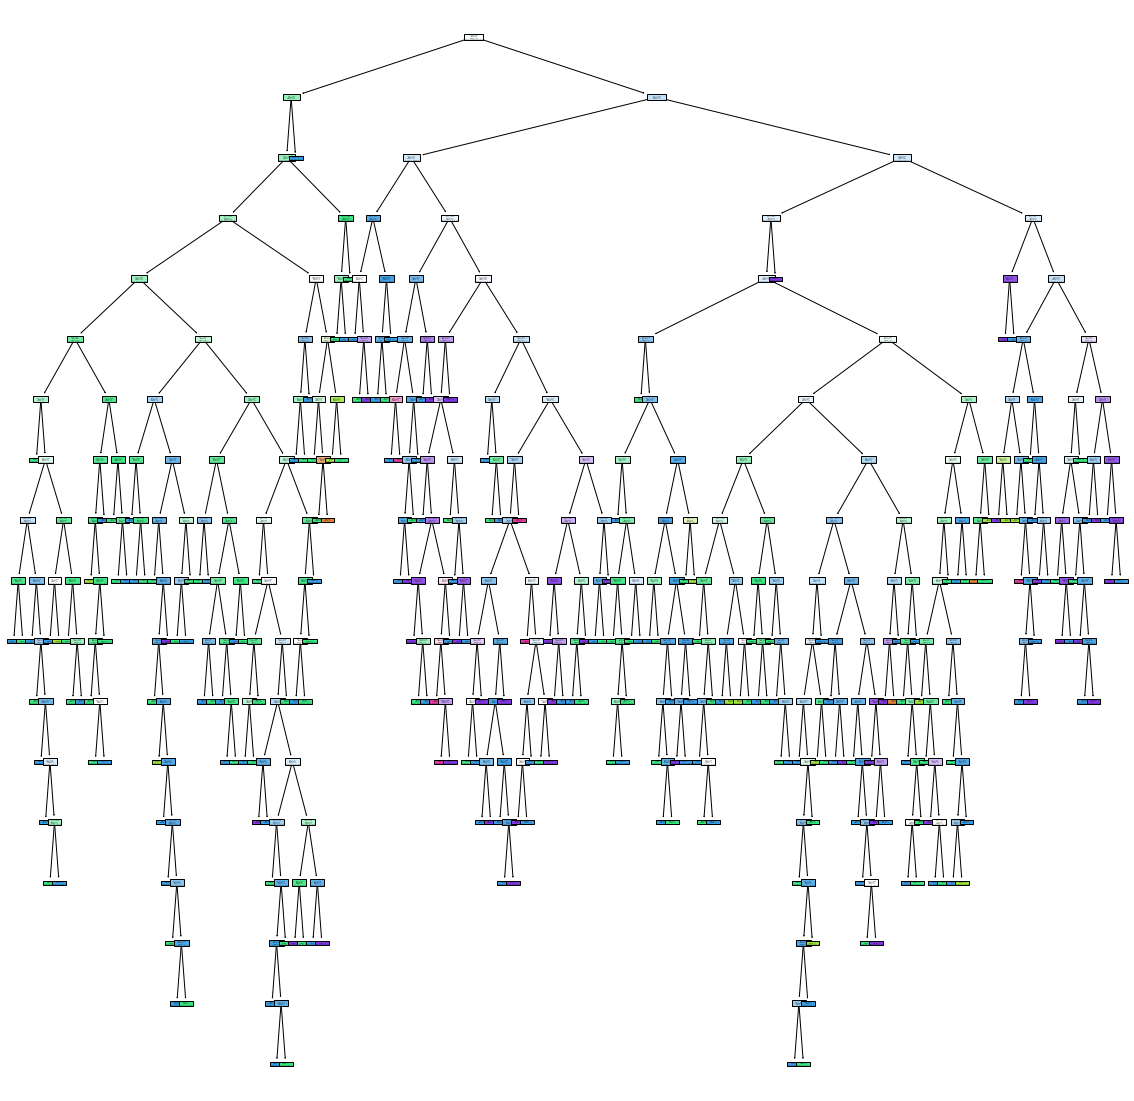

In [12]:
model_random = RandomForestClassifier(n_estimators=5)
model_random.fit(X_train,y_train)
model_random.score(X_test,y_test)
model_random.estimators_[0]
plt.figure(figsize= (20,20))
tree.plot_tree(model_random.estimators_[1],filled=True)

In [14]:
grid_pram = {
    "n_estimators" : [5, 10 , 50 , 100 , 120 , 150],
    'criterion' :['gini' ,'entropy'],
    'max_depth' :range(4),
    'min_samples_leaf' :range(4) 
}

rf = RandomForestClassifier(n_estimators=5)
grid_serach_rf = GridSearchCV(param_grid= grid_pram, cv = 10 , n_jobs=6,verbose=1 ,estimator = rf)
grid_serach_rf.fit(X_train,y_train)
grid_serach_rf.best_params_

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


C:\Users\Honey\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Honey\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
840 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Honey\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Honey\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = P

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 2,
 'n_estimators': 50}

[Text(0.5, 0.875, 'X[1] <= 0.445\ngini = 0.644\nsamples = 747\nvalue = [5, 35, 513, 469, 165, 12]'),
 Text(0.25, 0.625, 'X[9] <= 0.685\ngini = 0.665\nsamples = 273\nvalue = [1, 2, 108, 197, 124, 12]'),
 Text(0.125, 0.375, 'X[7] <= 0.995\ngini = 0.631\nsamples = 137\nvalue = [0, 2, 82, 100, 31, 4]'),
 Text(0.0625, 0.125, 'gini = 0.515\nsamples = 23\nvalue = [0, 0, 1, 23, 13, 1]'),
 Text(0.1875, 0.125, 'gini = 0.608\nsamples = 114\nvalue = [0, 2, 81, 77, 18, 3]'),
 Text(0.375, 0.375, 'X[7] <= 0.996\ngini = 0.629\nsamples = 136\nvalue = [1, 0, 26, 97, 93, 8]'),
 Text(0.3125, 0.125, 'gini = 0.411\nsamples = 41\nvalue = [0, 0, 2, 14, 51, 2]'),
 Text(0.4375, 0.125, 'gini = 0.619\nsamples = 95\nvalue = [1, 0, 24, 83, 42, 6]'),
 Text(0.75, 0.625, 'X[1] <= 0.593\ngini = 0.578\nsamples = 474\nvalue = [4, 33, 405, 272, 41, 0]'),
 Text(0.625, 0.375, 'X[10] <= 9.85\ngini = 0.593\nsamples = 222\nvalue = [0, 12, 160, 158, 25, 0]'),
 Text(0.5625, 0.125, 'gini = 0.434\nsamples = 98\nvalue = [0, 5, 106,

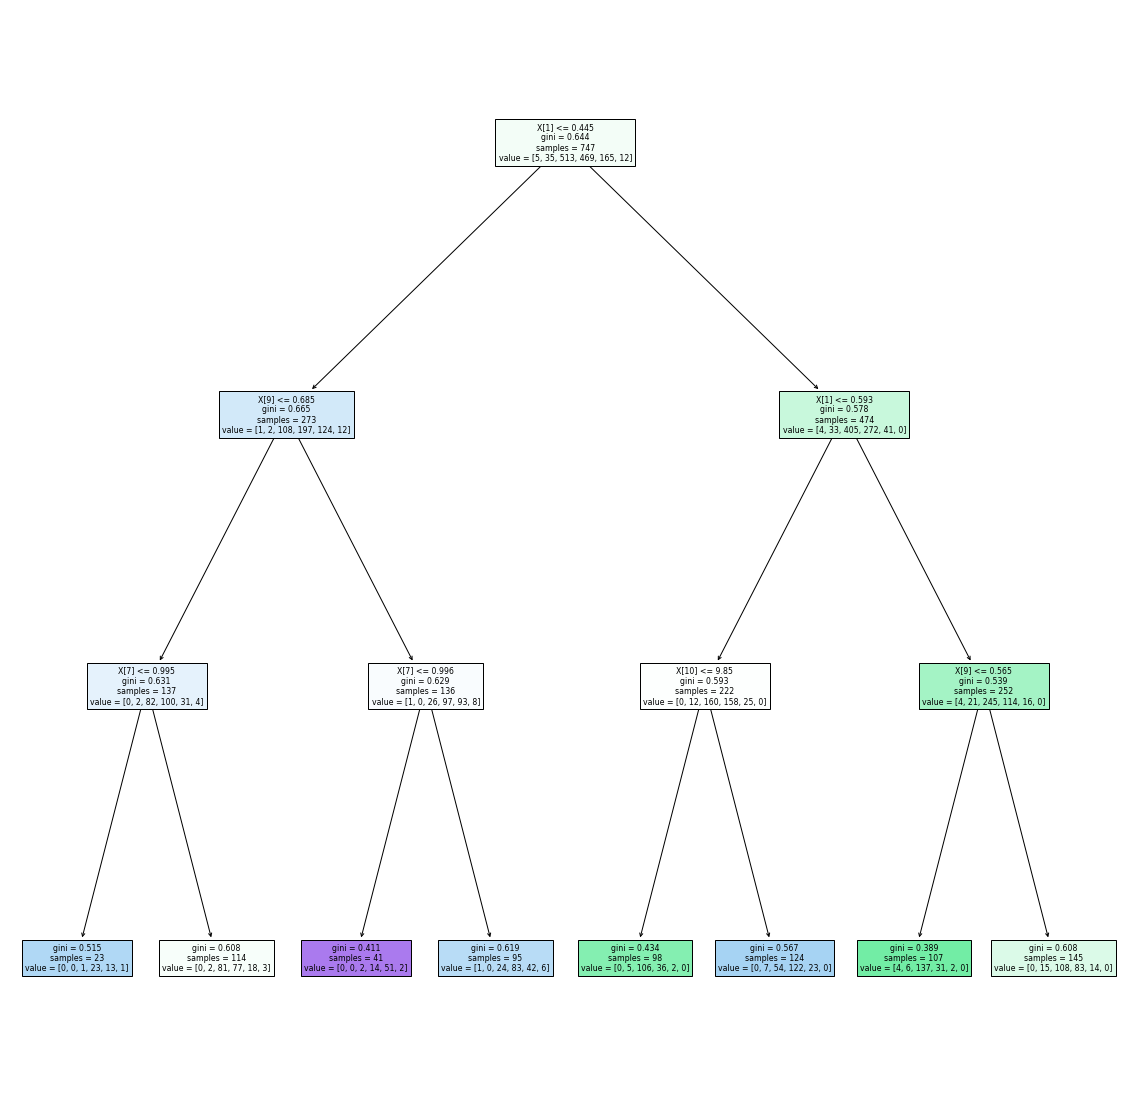

In [17]:
rf_new = RandomForestClassifier(criterion='gini' , max_depth=3 , min_samples_leaf= 2 , n_estimators=50)
rf_new.fit(X_train,y_train)
rf_new.score(X_test,y_test)
plt.figure(figsize = (20,20))
tree.plot_tree(rf_new.estimators_[0] , filled = True )